
# Load Data
# Load the training and test datasets.


In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

# Set style for plots
sns.set(style="whitegrid")



# Load the training and test datasets.


In [2]:
#  Load Data
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")



# Drop any rows from `train_df` where the target column, `category`, has missing values.

In [3]:
#  Drop Rows with Missing Target
train_df.dropna(axis=0, subset=['category'], inplace=True)



# Separate the target variable (`y`) from the features in `train_df`.


In [4]:
#  Define Target and Features
y = train_df['category']  # Define target variable
train_df.drop(['category'], axis=1, inplace=True)  # Drop target from features



# Create new features like `total_people`, `total_nights`, and `total_person_nights`. Drop unused columns.



In [5]:
# Feature Engineering
train_df['total_people'] = train_df['female_count'] + train_df['male_count']
test_df['total_people'] = test_df['female_count'] + test_df['male_count']
train_df.drop(['female_count', 'male_count'], axis=1, inplace=True)
test_df.drop(['female_count', 'male_count'], axis=1, inplace=True)

train_df['total_nights'] = train_df['mainland_nights'] + train_df['island_nights']
train_df['total_person_nights'] = train_df['total_people'] * train_df['total_nights']
test_df['total_nights'] = test_df['mainland_nights'] + test_df['island_nights']
test_df['total_person_nights'] = test_df['total_people'] * test_df['total_nights']


### EDA - Target Distribution

This section focuses on visualizing the distribution of the target variable (category) in the dataset. The **count plot** is used to display the frequency of each category in the target variable. It provides insights into the distribution of the target classes, which is helpful for understanding whether the dataset is balanced or imbalanced.

The count plot shows the number of occurrences of each category in the target variable. The x-axis represents the categories, while the y-axis represents the frequency of each category.

Key insights from this plot include:
- Identifying if any categories are underrepresented or overrepresented.
- Determining whether any preprocessing (like balancing) might be needed for model training.

This visualization is an essential part of exploratory data analysis (EDA) as it helps in understanding the characteristics of the target variable before building models.


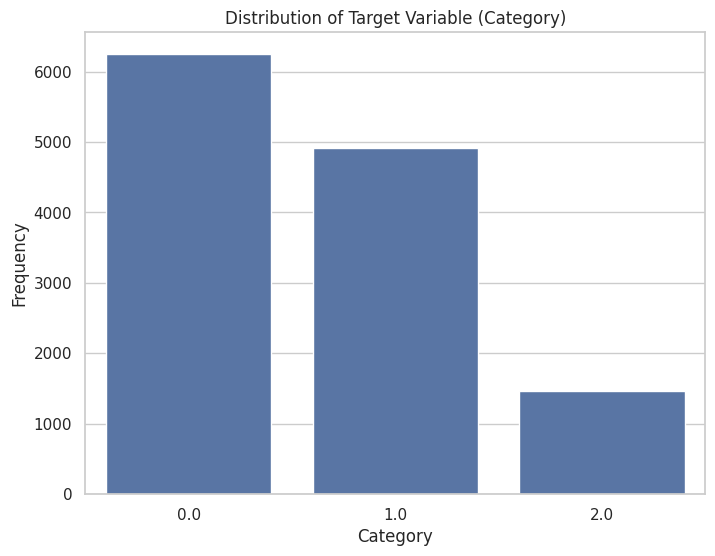

In [6]:
# EDA - Target Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Target Variable (Category)')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()


### EDA - Target Variable Distribution

This section visualizes the distribution of the target variable, `category`, from the dataset. A **count plot** is used to display the number of occurrences of each category in the target variable. This is helpful for identifying any class imbalances or variations in the dataset.

The plot shows the frequency (count) of each category in the target variable `category`. The x-axis represents the different categories, and the y-axis represents the count of instances for each category.

Key insights from this plot include:
- Observing whether the categories in the target variable are evenly distributed or if there are imbalances.
- Gaining an understanding of the class distribution, which can influence decisions regarding model selection or potential balancing techniques.

This analysis is a crucial part of the exploratory data analysis (EDA) phase to ensure the target variable is well-understood before proceeding with modeling.


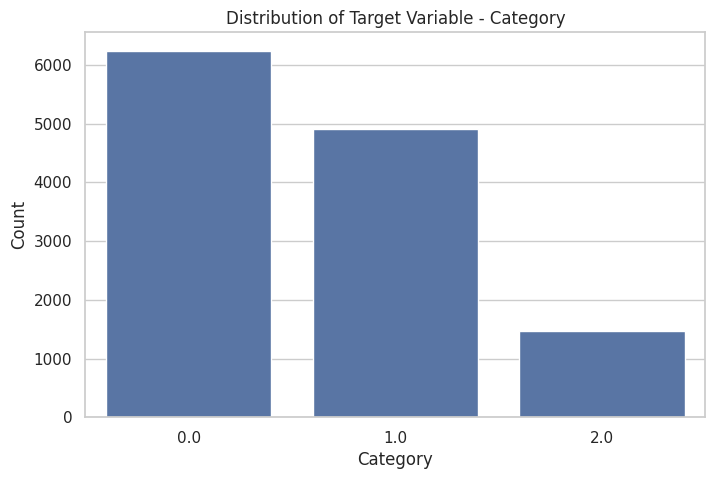

In [7]:
# EDA - Target Variable Distribution
original_df=pd.read_csv('./train.csv')
plt.figure(figsize=(8, 5))
sns.countplot(data=original_df, x='category')
plt.title("Distribution of Target Variable - Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


### EDA - Feature Distributions

In this section, we visualize the distributions of several features in the dataset. We use **histograms with kernel density estimation (KDE)** to observe the distribution of each feature. The histograms provide a view of the frequency distribution, while the KDE helps in understanding the underlying continuous distribution.

The features being analyzed are:
- **Female Count (`female_count`)**
- **Male Count (`male_count`)**
- **Mainland Nights (`mainland_nights`)**
- **Island Nights (`island_nights`)**

Each feature is visualized in its own subplot, and different colors are used for each to make the plots more distinguishable.

Key insights from these plots include:
- Understanding the distribution of numerical features.
- Identifying skewness, normality, or multimodal behavior in the data.
- Helping in the identification of outliers or unusual patterns in each feature.

This type of analysis is important for understanding the individual characteristics of the features before building machine learning models.


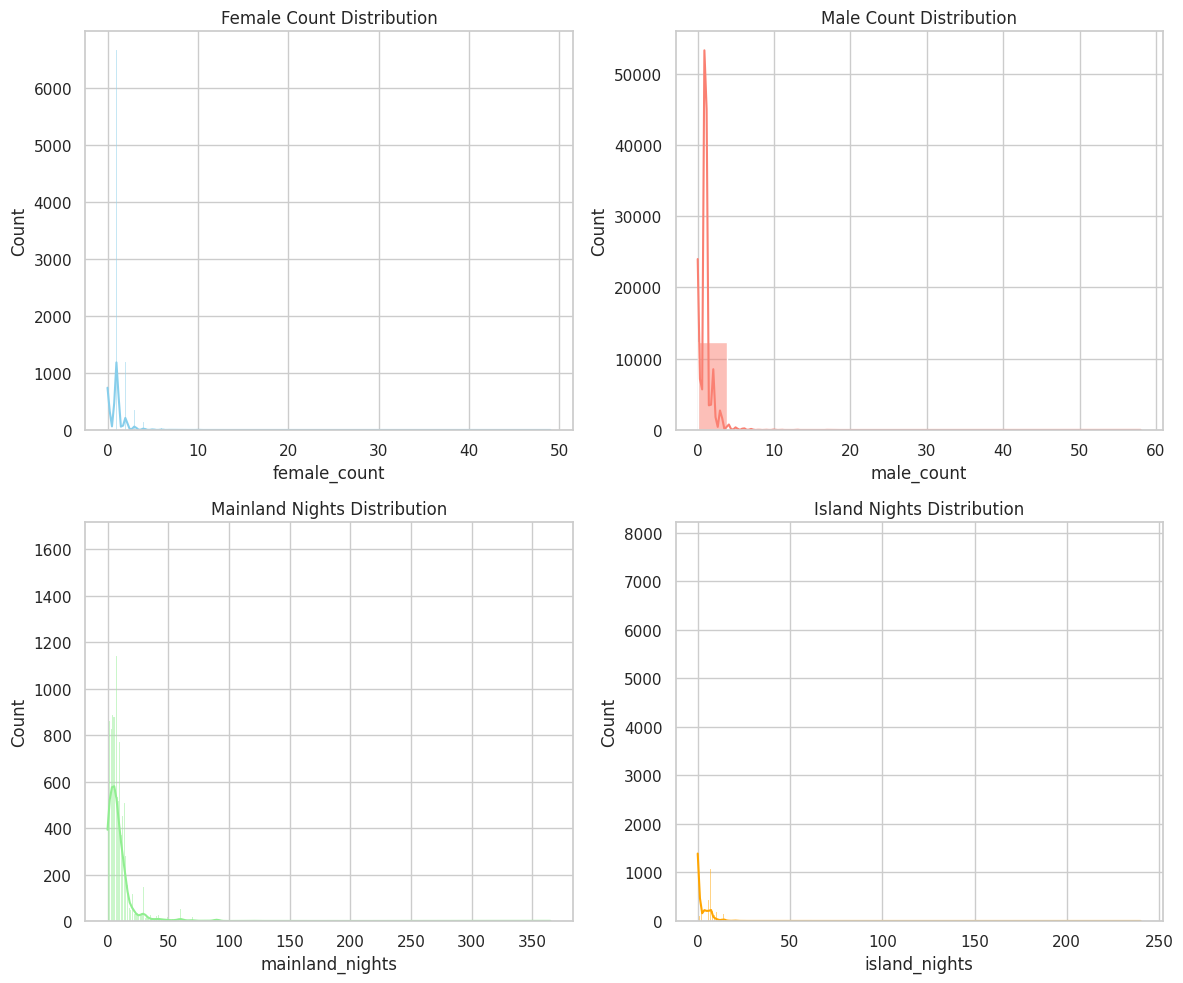

In [8]:
# EDA - Feature Distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(original_df['female_count'], kde=True, ax=axes[0, 0], color="skyblue").set(title="Female Count Distribution")
sns.histplot(original_df['male_count'], kde=True, ax=axes[0, 1], color="salmon").set(title="Male Count Distribution")
sns.histplot(original_df['mainland_nights'], kde=True, ax=axes[1, 0], color="lightgreen").set(title="Mainland Nights Distribution")
sns.histplot(original_df['island_nights'], kde=True, ax=axes[1, 1], color="orange").set(title="Island Nights Distribution")
plt.tight_layout()
plt.show()


### EDA - Correlation Heatmap

This section generates a **correlation heatmap** to visualize the relationships between numerical features in the dataset. The correlation matrix helps to understand the linear relationships between different pairs of features. The heatmap uses color coding to highlight the strength and direction of the correlations.

The following steps are performed:
- **Numerical columns selection**: Only numerical columns from the dataset are selected for correlation analysis.
- **Correlation matrix computation**: The correlation between numerical features is calculated.
- **Heatmap plotting**: A heatmap is used to visualize the correlation matrix. The `coolwarm` color map is applied, with annotations displaying the correlation coefficients.

Key insights from this heatmap include:
- Identifying features that are highly correlated, which could indicate redundancy in the dataset.
- Observing positive or negative relationships between pairs of features.
- Helping in feature selection by identifying which features might be combined or removed.

This visualization is an essential part of exploratory data analysis (EDA) as it aids in understanding relationships between variables and guiding feature engineering for machine learning models.


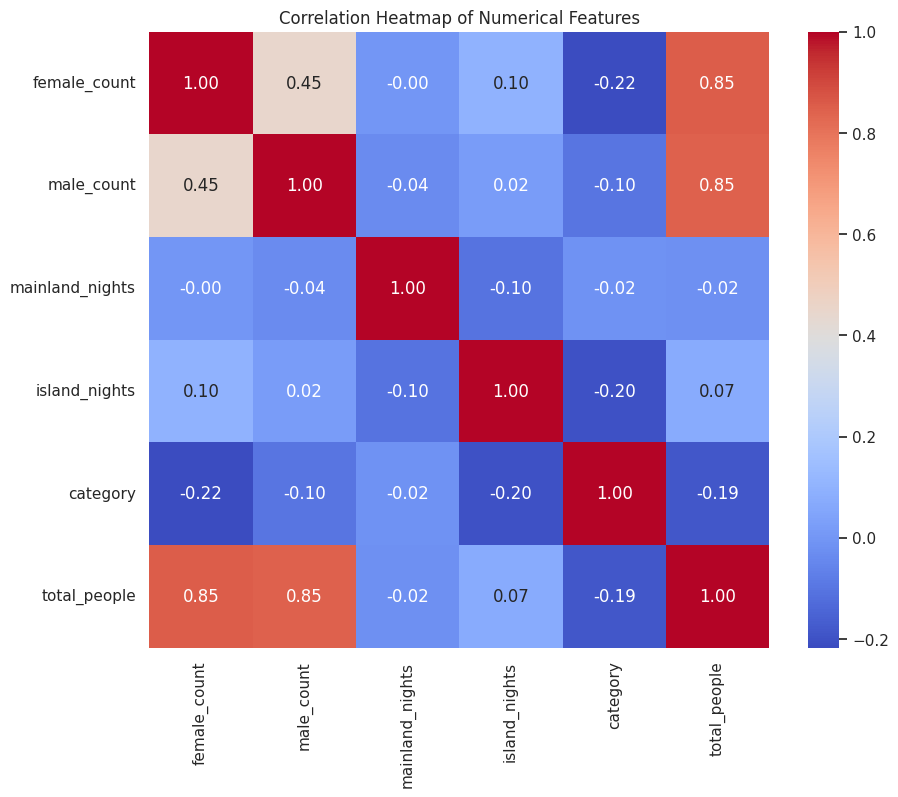

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation matrix
numerical_df = original_df.select_dtypes(include=['number'])

# Compute correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


### Feature Engineering - Total People

In this step, a new feature, `total_people`, is created by combining the `female_count` and `male_count` columns in both the training and test datasets. This new feature represents the total number of people and can provide useful information for modeling.

The following operations are performed:
- **Total People Calculation**: The sum of `female_count` and `male_count` is computed and assigned to a new column, `total_people`, in both the training (`original_df`) and test (`original_test`) datasets.

This feature engineering step is valuable because it consolidates information from two separate features (female and male counts) into a single variable, which might be useful for predictive modeling, reducing the dimensionality of the dataset and potentially improving model performance.


In [10]:
#  Feature Engineering - Total People
original_test=pd.read_csv('./test.csv')
original_df['total_people'] = original_df['female_count'] + original_df['male_count']
original_test['total_people'] = original_test['female_count'] + original_test['male_count']


#  EDA - Category vs. Total People
plt.figure(figsize=(8, 5))
sns.boxplot(data=original_df, x='category', y='total_people', palette="viridis")
plt.title("Total People by Category")
plt.xlabel("Category")
plt.ylabel("Total People")
plt.show()


<ipython-input-11-12bed1e80b16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_df, x='category', y='total_people', palette="viridis")


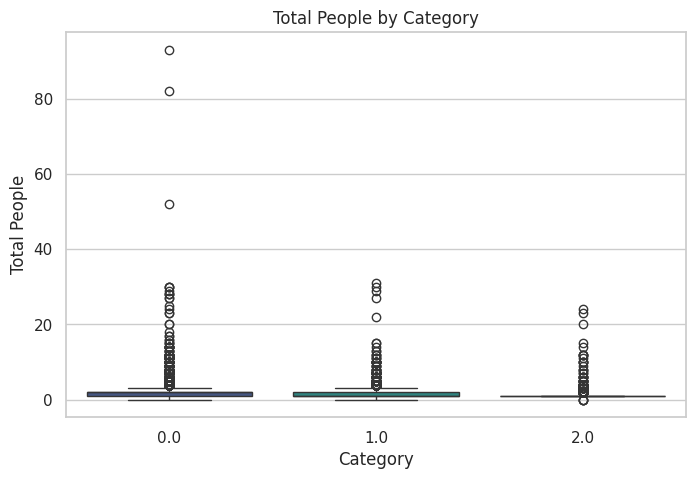

In [11]:
#  EDA - Category vs. Total People
plt.figure(figsize=(8, 5))
sns.boxplot(data=original_df, x='category', y='total_people', palette="viridis")
plt.title("Total People by Category")
plt.xlabel("Category")
plt.ylabel("Total People")
plt.show()


### Feature Engineering - Total Nights and Total Person-Nights

In this step, two new features are created:
- **Total Nights (`total_nights`)**: This feature represents the sum of `mainland_nights` and `island_nights`. It captures the total number of nights spent across both mainland and island locations.
- **Total Person-Nights (`total_person_nights`)**: This feature is calculated by multiplying `total_people` (created earlier) by `total_nights`. It represents the total number of person-nights, giving a measure of how many people were involved in the total nights spent.

These new features are added to both the training (`train_df`) and test (`test_df`) datasets.

The operations performed are:
- **Total Nights Calculation**: The sum of `mainland_nights` and `island_nights` is computed and stored in `total_nights`.
- **Total Person-Nights Calculation**: The `total_people` is multiplied by `total_nights` to compute `total_person_nights`.

Key insights from these feature engineering steps include:
- **Total Nights** helps to capture the overall duration of stay across both mainland and island locations.
- **Total Person-Nights** provides a more comprehensive metric by factoring in the number of people and the duration of their stay, which can be a useful feature for modeling purposes.

These new features are likely to improve the performance of machine learning models by providing more detailed information about the data.


In [12]:
#Feature Engineering - Total Nights and Total Person-Nights
train_df['total_nights'] = train_df['mainland_nights'] + train_df['island_nights']
test_df['total_nights'] = test_df['mainland_nights'] + test_df['island_nights']
train_df['total_person_nights'] = train_df['total_people'] * train_df['total_nights']
test_df['total_person_nights'] = test_df['total_people'] * test_df['total_nights']


### EDA - Category vs. Total Person-Nights

In this section, we explore the distribution of the newly engineered feature `total_person_nights` across different categories in the target variable `category`. A **box plot** is used to visualize this relationship, helping us understand how `total_person_nights` varies by category.

The following steps are performed:
1. **Stripping Column Names**: Any leading or trailing spaces in the column names are removed to ensure consistency and avoid potential issues with column referencing.
2. **Handling Non-Numeric Values**: The `total_person_nights` column is converted to numeric values using `pd.to_numeric()`. Any errors in conversion (such as non-numeric values) are coerced into `NaN`.
3. **Dropping Missing Values**: Rows with missing values in the `total_person_nights` column are dropped to ensure clean data for analysis.

The **box plot** is then created using the `plasma` color palette, with the `category` feature on the x-axis and `total_person_nights` on the y-axis. The plot displays the distribution, including the median, interquartile range (IQR), and potential outliers for each category.

Key insights from this plot include:
- **Distribution by Category**: Understanding how `total_person_nights` is distributed across different categories.
- **Outliers**: Identifying any categories with unusually high or low values for `total_person_nights`.
- **Comparison**: Comparing the central tendency (median) and spread of `total_person_nights` between categories.

This visualization is crucial for exploring how the new feature `total_person_nights` relates to the target variable and can inform further feature engineering or model selection.


<ipython-input-32-9ff7dd577655>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_df, x='category', y='total_person_nights', palette="plasma")


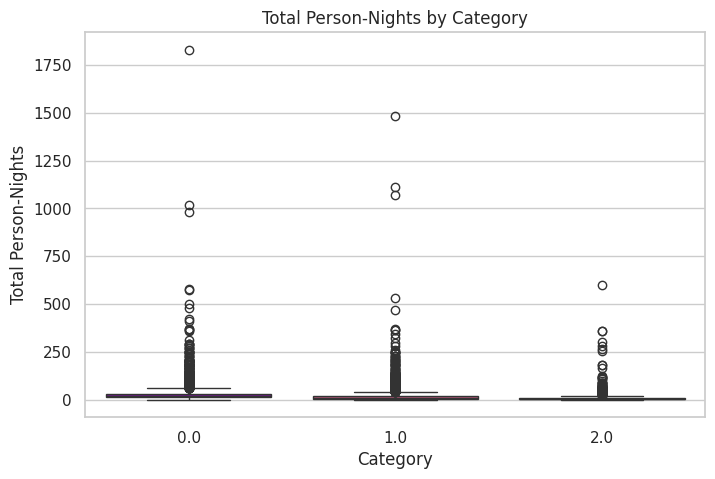

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Strip any leading/trailing spaces in column names
original_df.columns = original_df.columns.str.strip()

# Check data types and handle any non-numeric values
original_df['total_person_nights'] = pd.to_numeric(train_df['total_person_nights'], errors='coerce')

# Drop rows with missing values (if any)
original_df = original_df.dropna(subset=['total_person_nights'])

# Cell 10: EDA - Category vs. Total Person-Nights
plt.figure(figsize=(8, 5))
sns.boxplot(data=original_df, x='category', y='total_person_nights', palette="plasma")
plt.title("Total Person-Nights by Category")
plt.xlabel("Category")
plt.ylabel("Total Person-Nights")
plt.show()


### EDA - Total People vs Total Nights

In this section, a **scatter plot** is used to visualize the relationship between two important features: `total_people` and `total_nights`. This plot helps to explore how the number of people correlates with the number of nights spent, and how this relationship varies across different categories.

The following steps are performed:
- **Scatter Plot**: A scatter plot is created with `total_people` on the x-axis and `total_nights` on the y-axis. Each point is colored based on the `category` using the `hue` parameter to represent different categories, providing a visual indication of how these two features relate to each other within each category.

Key insights from this plot include:
- **Understanding Relationships**: Examining whether there is any visible correlation between the number of people (`total_people`) and the number of nights (`total_nights`).
- **Category Distribution**: Observing how different categories are distributed in relation to these two features, which can give insights into how the category affects the relationship between people and nights.
- **Identifying Clusters**: Detecting any potential clusters or patterns within categories that may help in future feature engineering or model analysis.

This visualization is valuable for exploring the interactions between `total_people` and `total_nights` and understanding how these features may influence the target variable in the context of the dataset.



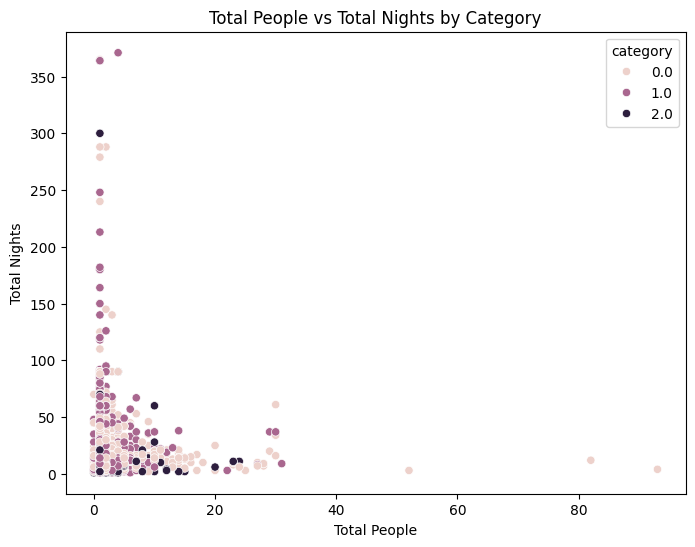

In [18]:
#  EDA - Total People vs Total Nights
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df['total_people'], y=train_df['total_nights'], hue=y)
plt.title('Total People vs Total Nights by Category')
plt.xlabel('Total People')
plt.ylabel('Total Nights')
plt.show()


### Data Splitting

In this step, the dataset is split into training and validation sets using the `train_test_split` function. The data is divided such that:
- **80%** of the data is used for training (`X_train`, `y_train`).
- **20%** of the data is used for validation (`X_valid`, `y_valid`).

The split is done while maintaining the distribution of the target variable `y` in both sets (`stratify=y`), ensuring that both training and validation sets have a representative sample of all categories.



In [18]:
# : Split Data
X_train, X_valid, y_train, y_valid = train_test_split(
    train_df, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y
)



# Separate the categorical columns (low-cardinality) and numerical columns to prepare for encoding and model training.


In [19]:
#  Identify Categorical and Numerical Columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]
low_cardinality_cols = [cname for cname in object_cols if X_train[cname].nunique() < 10]
numeric_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# Select only necessary columns for modeling
selected_cols = low_cardinality_cols + numeric_cols
X_train = X_train[selected_cols].copy()
X_valid = X_valid[selected_cols].copy()
X_test = test_df[selected_cols].copy()



# Apply one-hot encoding to categorical columns to prepare the data for model training.


In [20]:
#  One-Hot Encoding
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)

# Align columns in training, validation, and test sets
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)



# Ensure all column names are compatible with XGBoost by removing special characters.



In [21]:
#  Clean Column Names
def clean_column_names(df):
    df.columns = df.columns.str.replace('[\[\]<>,]', '', regex=True)
    return df

X_train = clean_column_names(X_train)
X_valid = clean_column_names(X_valid)
X_test = clean_column_names(X_test)



# Train an initial XGBoost model with early stopping to check baseline performance.



In [22]:
#  Train Initial XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05, early_stopping_rounds=10, eval_metric="mae", random_state=0, n_jobs=-1)
xgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=0)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)


# Perform a randomized search on the XGBoost model to find the best parameters.


In [23]:
#  Randomized Search for XGBoost
param_grid = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}

random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=0),
                                   param_distributions=param_grid, cv=3,
                                   scoring='neg_mean_absolute_error', n_jobs=-1,
                                   n_iter=10, verbose=1)
random_search.fit(X_train, y_train)

# Get the best parameters
best_xgb_params = random_search.best_params_
print("Best XGBoost Parameters:", best_xgb_params)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}



# Train the XGBoost model with the best parameters found during hyperparameter tuning.


In [24]:
#  Train Final XGBoost Model
xgb_final = XGBRegressor(**best_xgb_params, random_state=0)
xgb_final.fit(X_train, y_train)
xgb_predictions = xgb_final.predict(X_valid)



# Train a RandomForest model to use as part of an ensemble.


In [25]:
#  Train RandomForest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_valid)



# Average the predictions from the XGBoost and RandomForest models to create an ensemble prediction.


In [26]:
#  Ensemble Model
ensemble_predictions = (xgb_predictions + rf_predictions) / 2
ensemble_mae = mean_absolute_error(y_valid, ensemble_predictions)
print("Ensemble Model Mean Absolute Error:", ensemble_mae)


Ensemble Model Mean Absolute Error: 0.3430108329706673



# Generate predictions on the test set for the XGBoost, RandomForest, and ensemble models. Save these predictions to CSV files.


In [27]:
 #Predict on Test Set and Save Outputs
# Make predictions on the test set
xgb_test_predictions = xgb_final.predict(X_test)
rf_test_predictions = rf_model.predict(X_test)
ensemble_test_predictions = (xgb_test_predictions + rf_test_predictions) / 2

# Convert continuous predictions into discrete class labels (e.g., 0, 1, 2)
# Adjust bin ranges and labels as needed based on your specific dataset distribution
bins = [-float('inf'), 0.6, 1.3, float('inf')]
labels = [0, 1, 2]

xgb_test_predictions_class = pd.cut(xgb_test_predictions, bins=bins, labels=labels).astype(int)
rf_test_predictions_class = pd.cut(rf_test_predictions, bins=bins, labels=labels).astype(int)
ensemble_test_predictions_class = pd.cut(ensemble_test_predictions, bins=bins, labels=labels).astype(int)

# Create output DataFrames with 'trip_ID' and classified predictions
xgb_output = pd.DataFrame({'trip_ID': test_df['trip_ID'], 'category': xgb_test_predictions_class})
rf_output = pd.DataFrame({'trip_ID': test_df['trip_ID'], 'category': rf_test_predictions_class})
ensemble_output = pd.DataFrame({'trip_ID': test_df['trip_ID'], 'category': ensemble_test_predictions_class})

# Save predictions to CSV files
xgb_output.to_csv('xgb_predictions.csv', index=False)
rf_output.to_csv('rf_predictions.csv', index=False)
ensemble_output.to_csv('ensemble_predictions.csv', index=False)

print("Classified predictions for XGBoost, RandomForest, and Ensemble models saved successfully.")


Classified predictions for XGBoost, RandomForest, and Ensemble models saved successfully.
